<a href="https://colab.research.google.com/github/kungfumas/mesin-belajar/blob/master/Klasifikasi_knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=columns)

In [49]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


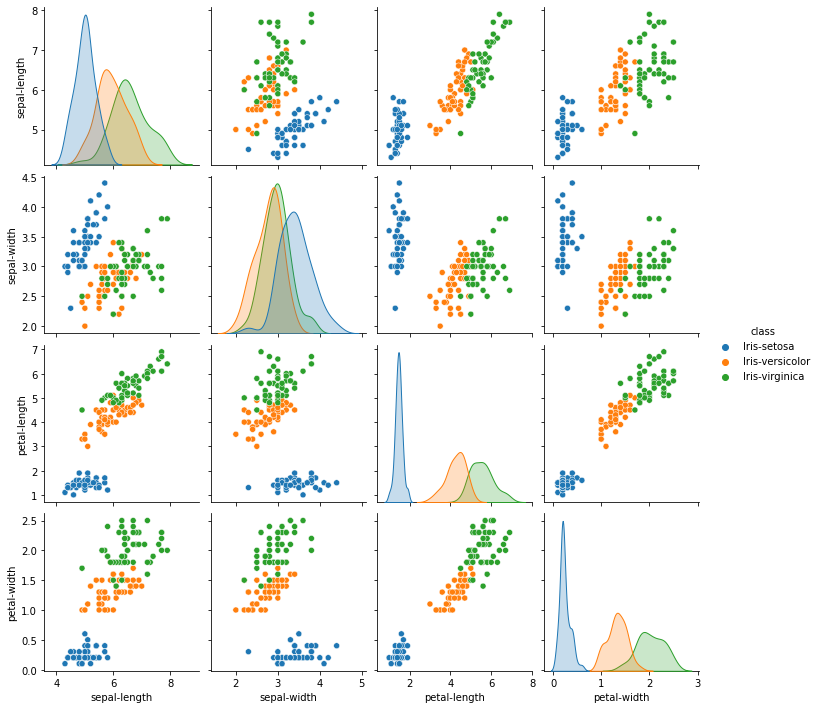

In [51]:
sns.pairplot(df, hue='class')

In [52]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [54]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

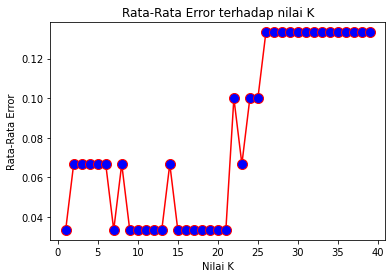

In [56]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [57]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



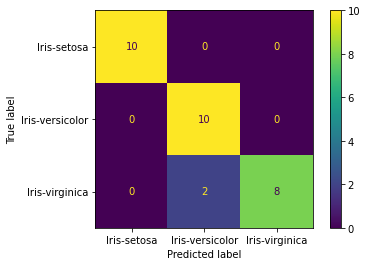

In [59]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()

In [60]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

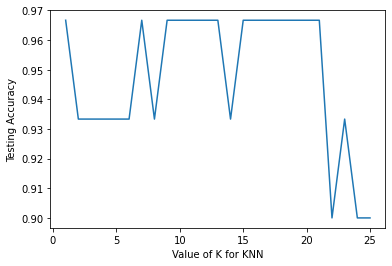

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [63]:

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(y_predict[0])
print(y_predict[1])

Iris-versicolor
Iris-setosa


In [64]:
import pickle
filename = 'knn_iris.pkl'
pickle.dump(knn, open(filename, 'wb')) 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(knn)
 
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
y_predict=knn_from_pickle.predict(x_new)
print(y_predict[0])
print(y_predict[1])

Iris-versicolor
Iris-setosa


In [65]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(knn, 'knn_iris2.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('knn_iris2.pkl')
 
# Use the loaded model to make predictions
y_predict=knn_from_joblib.predict(x_new)

print(y_predict[0])
print(y_predict[1])

Iris-versicolor
Iris-setosa


In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

In [67]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



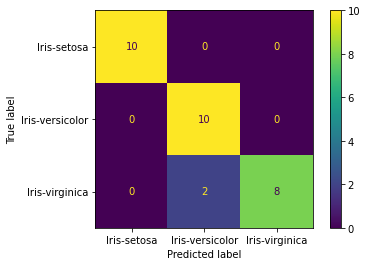

In [68]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()